In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
%cd drive/My\ Drive/LogoDetection/qmul_toplogo10/
#go to appropriate directory in drive

[Errno 2] No such file or directory: 'drive/My Drive/LogoDetection/qmul_toplogo10/'
/content/drive/My Drive/LogoDetection/qmul_toplogo10


In [0]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [42]:
dir = "masks"
temp = os.path.join(str(dir))

boxes = np.zeros((700, 4))
cnt = 0

for temp_dir_name in sorted(os.listdir(temp)):

    print(temp_dir_name)
    tmp = os.path.join(str(dir) + '/' + str(temp_dir_name))

    for fil in sorted(os.listdir(tmp)):
      f = open(str(dir) + '/' + str(temp_dir_name) + '/' + str(fil), "r")
      
      contents = f.read()

      w1 = int(contents.split()[0])
      h1 = int(contents.split()[1])
      w2 = int(contents.split()[2]) + w1
      h2 = int(contents.split()[3]) + h1

      boxes[cnt][0] = w1
      boxes[cnt][1] = h1
      boxes[cnt][2] = w2
      boxes[cnt][3] = h2

      cnt += 1

print(type(boxes))

adidas0
chanel
gucci
hh
lacoste
mk
nike
prada
puma
supreme
<class 'numpy.ndarray'>


In [43]:
print(boxes)
boxes = np.reshape(boxes, (700, 4))
np.save('boxes', boxes)

[[567. 408. 730. 563.]
 [616.   7. 774. 118.]
 [283.  69. 369. 127.]
 ...
 [159. 226. 425. 339.]
 [293. 163. 368. 189.]
 [153. 160. 466. 267.]]


In [44]:
print(boxes.shape)

(700, 4)


The following cell is only for testing purposes. It can be used to check the correctness of the formula used for reshaping the bounding box dimensions for the variuos images...

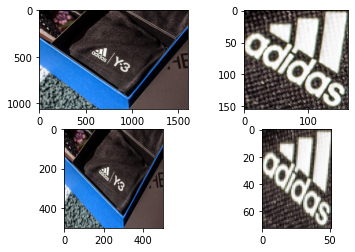

In [45]:
H, W = 500, 500
im = cv2.imread(str("jpg") + '/' + str("adidas0") + '/' + str("adidas1.jpg")) # boxes are stored in the sorted order of file names
                                                                              # therefore, boxes[0] has bounding box for 'adidas1.jpg'
                                                                              # boxes[1] has bounding box for 'adidas10.jpg'
                                                                              # boxes[2] has bouding box for 'adidas11.jpg' and so on...
box = boxes[0]

fig, axis = plt.subplots(2, 2)    # Use subplots to see the resized images along with the resized bounding box images...

w1 = int(box[0])
h1 = int(box[1])
w2 = int(box[2])
h2 = int(box[3])

axis[0,0].imshow(im)
axis[0,1].imshow(im[h1:h2, w1:w2, :])


tmpImg = np.zeros((H, W, 3))
w1 = int(w1 * (W / im.shape[1]))
h1 = int(h1 * (H / im.shape[0]))
w2 = int(w2 * (W / im.shape[1]))
h2 = int(h2 * (H / im.shape[0]))
tmpImg = cv2.resize(im , (H, W), interpolation = cv2.INTER_AREA)
axis[1,0].imshow(tmpImg)

tmpImg = tmpImg[h1:h2, w1:w2, :]
axis[1,1].imshow(tmpImg)


The below cell resizes all the images to H x W (500, 500) and resizes the bounding boxes accordingly 

In [46]:
H, W = 500, 500

labels = np.zeros(700, dtype = 'uint8')
images = np.zeros((700, H, W, 3), dtype = 'uint8')
cnt = 0

dir = "jpg"
temp = os.path.join(str(dir))

for temp_dir_name in sorted(os.listdir(temp)):

    print(temp_dir_name)
    tmp = os.path.join(str(dir) + '/' + str(temp_dir_name))

    for image in sorted(os.listdir(tmp)):
      
      if image.endswith(".jpg") or image.endswith(".png"):
        
        im = cv2.imread(str(dir) + '/' + str(temp_dir_name) + '/' + str(image))
        
        box = boxes[cnt]
        # box = box.reshape((1,4))
        
        w1 = int(box[0])
        h1 = int(box[1])
        w2 = int(box[2])
        h2 = int(box[3])

        tmpImg = np.zeros((H, W, 3))

        w1 = int(w1 * (W / im.shape[1]))
        h1 = int(h1 * (H / im.shape[0]))
        w2 = int(w2 * (W / im.shape[1]))
        h2 = int(h2 * (H / im.shape[0]))

        boxes[cnt] = [w1, h1, w2, h2]

        tmpImg = cv2.resize(im , (H, W), interpolation = cv2.INTER_AREA)

        images[cnt] = tmpImg
        
        cnt += 1
    

adidas0
chanel
gucci
hh
lacoste
mk
nike
prada
puma
supreme


Following cell for testing purposes only...

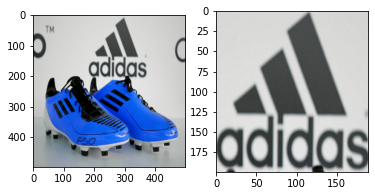

In [47]:
num = 34 # choose any random number between 0 and 699...
box = boxes[num]
im = images[num]

w1 = int(box[0])
h1 = int(box[1])
w2 = int(box[2])
h2 = int(box[3])

fig, axis = plt.subplots(1, 2)

axis[0].imshow(im)
axis[1].imshow(im[h1:h2, w1:w2, :])

At present, all images have been resized to HxWx3 (500, 500, 3) and the adjusted bounding box dimensions have been stored in boxes (4x700) numpy array. I am saving the boxes here.

In [0]:
np.save('modBoundBoxes', boxes)